### 1. Load The Dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 1.24MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [1]:
import pandas as pd

original_df = pd.read_csv('Pokemon.csv')

original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 2. Select Features

In [2]:
modified_df = original_df[['HP', 'Attack', 'Defense',
                           'Sp. Atk', 'Sp. Def', 'Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


### 3. Split into 3 Partitions: Train, Val & Test 

In [3]:
shuffled_df = modified_df.sample(frac=1)

shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
690,70,55,75,45,65,60
410,40,55,80,35,60,30
713,91,72,90,129,90,108
640,110,65,75,125,85,30
107,55,130,115,50,50,75


In [4]:
train_df = shuffled_df[:500]
val_df = shuffled_df[500:650]
test_df = shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [5]:
X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]
X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]
X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

### 4. Preprocess The Inputs

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

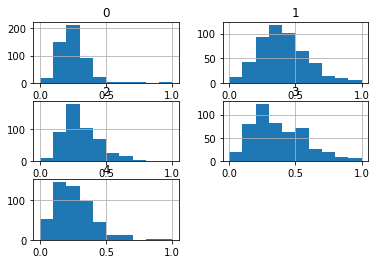

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

### 5. Pick The Best Model w/ Lowest Validation Error

In [7]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

22.075359999999996

In [8]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

18.075402268899815

In [9]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

18.88553333333333

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 18ms/step - loss: 27069.9316 - mean_absolute_error: 156.6636 - val_loss: 15893.0820 - val_mean_absolute_error: 120.1641
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 11746.8350 - mean_absolute_error: 101.3625 - val_loss: 6075.7690 - val_mean_absolute_error: 71.6315
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4370.8398 - mean_absolute_error: 56.6877 - val_loss: 2051.1453 - val_mean_absolute_error: 37.6198
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1676.0858 - mean_absolute_error: 32.6164 - val_loss: 1090.1893 - val_mean_absolute_error: 26.1791
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 1106.3191 - mean_absolute_error: 26.0489 - val_loss: 988.3943 - val_mean_absolute_error: 25.0799
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 1062.3530 - mean_absolute_error: 25.4218 - val_loss: 988.6949 - va

16/16 [==============================] - 0s 3ms/step - loss: 711.2498 - mean_absolute_error: 21.0428 - val_loss: 697.5557 - val_mean_absolute_error: 20.5671
Epoch 49/100
16/16 [==============================] - 0s 3ms/step - loss: 710.3077 - mean_absolute_error: 21.0348 - val_loss: 696.7634 - val_mean_absolute_error: 20.5530
Epoch 50/100
16/16 [==============================] - 0s 3ms/step - loss: 709.0082 - mean_absolute_error: 20.9967 - val_loss: 691.9436 - val_mean_absolute_error: 20.4386
Epoch 51/100
16/16 [==============================] - 0s 3ms/step - loss: 704.7158 - mean_absolute_error: 20.9686 - val_loss: 692.5601 - val_mean_absolute_error: 20.4559
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 703.5857 - mean_absolute_error: 20.9397 - val_loss: 690.0779 - val_mean_absolute_error: 20.4012
Epoch 53/100
16/16 [==============================] - 0s 3ms/step - loss: 701.7272 - mean_absolute_error: 20.9160 - val_loss: 688.1332 - val_mean_absolute_error: 2

16/16 [==============================] - 0s 3ms/step - loss: 676.4153 - mean_absolute_error: 20.5117 - val_loss: 654.9984 - val_mean_absolute_error: 19.6949
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 677.6667 - mean_absolute_error: 20.5256 - val_loss: 657.2811 - val_mean_absolute_error: 19.7592
Epoch 98/100
16/16 [==============================] - 0s 3ms/step - loss: 678.2469 - mean_absolute_error: 20.4948 - val_loss: 655.7926 - val_mean_absolute_error: 19.7232
Epoch 99/100
16/16 [==============================] - 0s 3ms/step - loss: 676.0901 - mean_absolute_error: 20.5140 - val_loss: 653.4501 - val_mean_absolute_error: 19.6311
Epoch 100/100
16/16 [==============================] - 0s 3ms/step - loss: 676.2497 - mean_absolute_error: 20.4972 - val_loss: 657.6318 - val_mean_absolute_error: 19.7745


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 1804.4667 - mean_absolute_error: 32.9691 - val_loss: 873.3178 - val_mean_absolute_error: 23.5924
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 872.4094 - mean_absolute_error: 23.4485 - val_loss: 789.5596 - val_mean_absolute_error: 22.4027
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 755.9028 - mean_absolute_error: 21.5593 - val_loss: 660.4099 - val_mean_absolute_error: 19.8806
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 729.0132 - mean_absolute_error: 21.3384 - val_loss: 669.4991 - val_mean_absolute_error: 19.9627
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 700.3065 - mean_absolute_error: 20.7851 - val_loss: 661.9565 - val_mean_absolute_error: 19.6906
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 708.8547 - mean_absolute_error: 20.9594 - val_loss: 779.0099 - val_mean_absolute

16/16 [==============================] - 0s 3ms/step - loss: 638.5257 - mean_absolute_error: 19.8254 - val_loss: 625.5809 - val_mean_absolute_error: 19.1499
Epoch 49/100
16/16 [==============================] - 0s 3ms/step - loss: 651.4522 - mean_absolute_error: 20.0089 - val_loss: 624.8377 - val_mean_absolute_error: 19.2614
Epoch 50/100
16/16 [==============================] - 0s 3ms/step - loss: 635.1243 - mean_absolute_error: 19.9074 - val_loss: 613.8378 - val_mean_absolute_error: 18.7806
Epoch 51/100
16/16 [==============================] - 0s 3ms/step - loss: 693.8123 - mean_absolute_error: 20.5746 - val_loss: 758.1925 - val_mean_absolute_error: 21.6547
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 683.5240 - mean_absolute_error: 20.3540 - val_loss: 609.7899 - val_mean_absolute_error: 18.7466
Epoch 53/100
16/16 [==============================] - 0s 3ms/step - loss: 761.1650 - mean_absolute_error: 21.6169 - val_loss: 607.5168 - val_mean_absolute_error: 1

16/16 [==============================] - 0s 3ms/step - loss: 628.4595 - mean_absolute_error: 19.6863 - val_loss: 603.5706 - val_mean_absolute_error: 18.7723
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 617.9617 - mean_absolute_error: 19.9073 - val_loss: 639.6499 - val_mean_absolute_error: 19.3174
Epoch 98/100
16/16 [==============================] - 0s 3ms/step - loss: 669.2114 - mean_absolute_error: 20.3598 - val_loss: 604.1297 - val_mean_absolute_error: 18.6911
Epoch 99/100
16/16 [==============================] - 0s 3ms/step - loss: 687.1537 - mean_absolute_error: 20.6690 - val_loss: 582.2073 - val_mean_absolute_error: 18.2519
Epoch 100/100
16/16 [==============================] - 0s 3ms/step - loss: 613.8799 - mean_absolute_error: 19.4397 - val_loss: 592.9610 - val_mean_absolute_error: 18.4323


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


### 6. Evaluate The Chosen Model

In [14]:
mean_absolute_error(y_test, linear_model.predict(X_test))

18.388421887559318